# PPO


## Implementation

The Proximal Policy Optimization algorithm [(wiki page)](https://en.wikipedia.org/wiki/Proximal_policy_optimization) is an optimization algorithm to directly train the policy. 
The policy usually comes with two neural networks, one to model the action to be taken and one to estimate the value of a given state. The two networks can share some common layers if needed.

### Learning algorithm

The deep neural network Actor is used to predict the best actions for a given state.
The deep neural network Critic is used to predict the return for a given state.

Training directly the policy is not an easy task and it can lead to instability. 

PPO offers some techniques to help reducing this problem.

- Using a memory history of previous experience (rollout). The learning happens on a shuffled memory, this helps breaking the correlation between a sequence of steps/ recent steps. Hence the agent learns a more generic behavior.

- Use two networks, once for the training and driving the action and one for the value.  This further reduce the correlation between action and sequence, plus reduces the so called "moving target" problem. 

- Clippint the cost function, it guarantees the update is close to the current policy.

It also offers some key point to leverage spped up:

- Reuse the same memory multiple times, as we update closely to the current policy we can still use the rollouts of a past policy. We simply rebase the log probs given the new policy.

- Traing and rollout are separate, we can hence massively parallelize the rollouts.


Note, for continuous action, for continuous actions the actor network is not returning the actual action for the envinronment. 

It is returning the "mean" value, we then use a Gaussian distribution with a given standard deviation to the sample the actual action.



#### Hyperparameters
For calculating expected return and generalized advange
- GAMMA: 0.99
- TAU:   0.95

For adam optimizer:
- LR: 2e-4

For cost function computation and clipping:
- ENTROPY_BETA:  0.001
- EPS:           0.2

For memory rollout and number of updated before discarding the memory
- NUM_STEPS:   512
- BATCH_SIZE:  128
- PPO_UPDATES: 4



#### Model architecture

The critic network is composed of 3 fully connected layers, with relu activation functions:
- 33x64 
- Relu
- 64x64
- Relu
- 64x1

The actor network is composed of 3 fully connected layers with relu activation function, plus a final Tanh to final value is applied:
- 33x64
- Relu
- 64x64
- Relu
- 64x4
- Tanh

The log_std for the actor network is set to 0.0 and it is not changed during the training.

## Result

The agent is able to achieve the required performance after 175 episodes.

(it is however very sensible to changes in parameters that can lead to stalling the training or even getting a worse performance).



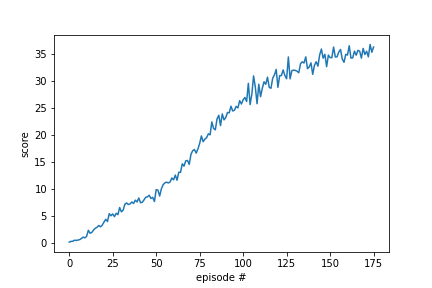

## Possible Improvements
It is possible to further improve the PPO algorithm by implementing additional features:
- "investigate robustness", changing the size of rollout (example passing from 512 to 1024) or other parameter is increasing the learning rate at the beginning of the training. However it also causes a deep crash in later episodes (stalling at 22-24 and then becoming even worse). It is worht investigating how to prevent this.
- "advantage normalization", normalizing the advantages can help speed up the training when the returns are dimishing.
- "reducing std", at every update reduce the standard deviation used in the actor network. This is similar to reduce the epsilon in a eps-greedy policy, towards the end of the optimization exploitation is prefered over exploration.
- "alternative approaches to DDPG".
